**LRN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

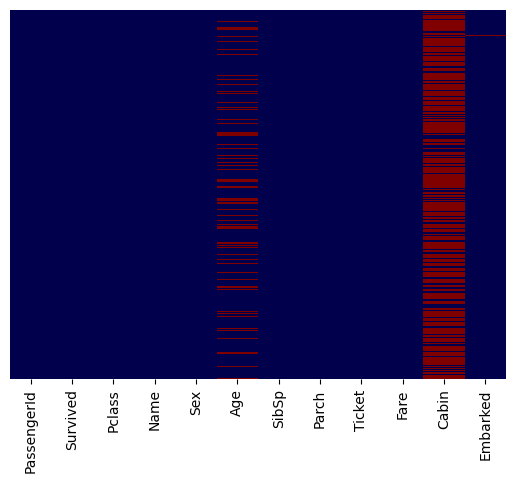

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='seismic')

<Axes: xlabel='Survived', ylabel='count'>

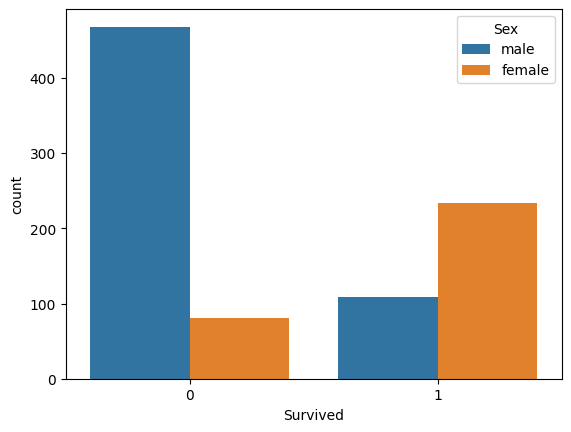

In [ ]:
sns.countplot(x='Survived',data=train,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

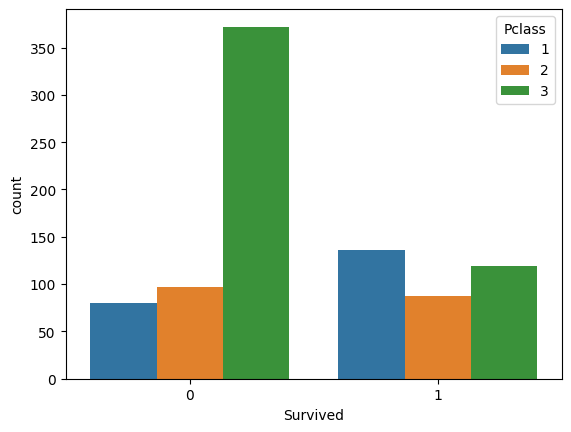

In [ ]:
sns.countplot(x='Survived',data=train,hue='Pclass')

<ipython-input-27-96d5b0357822>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False)


<Axes: xlabel='Age'>

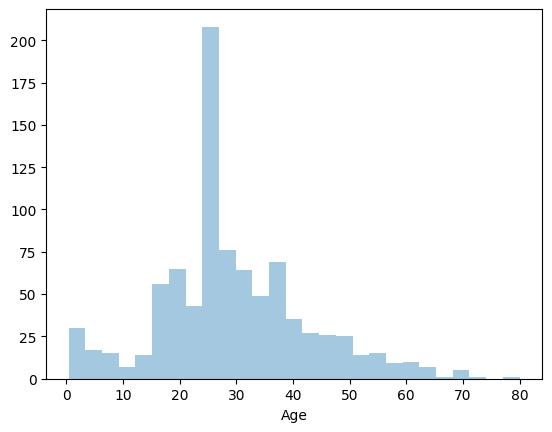

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False)

<Axes: xlabel='SibSp', ylabel='count'>

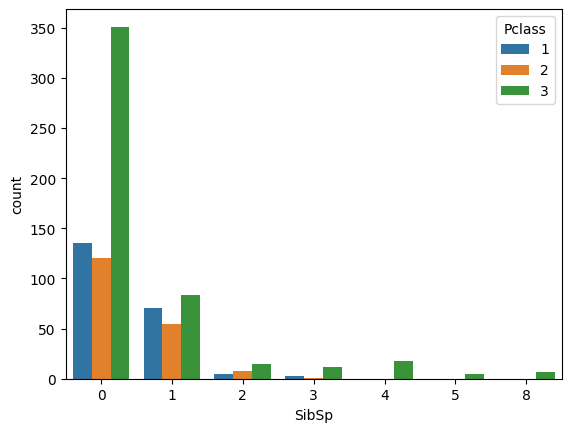

In [ ]:
sns.countplot(x='SibSp',data=train,hue='Pclass')

<Axes: >

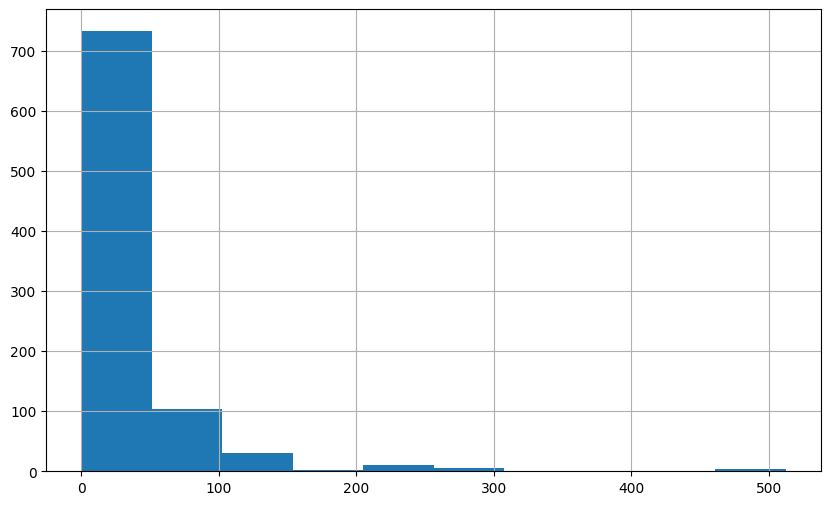

In [ ]:
train['Fare'].hist(figsize=(10,6))

<Axes: xlabel='Pclass', ylabel='Age'>

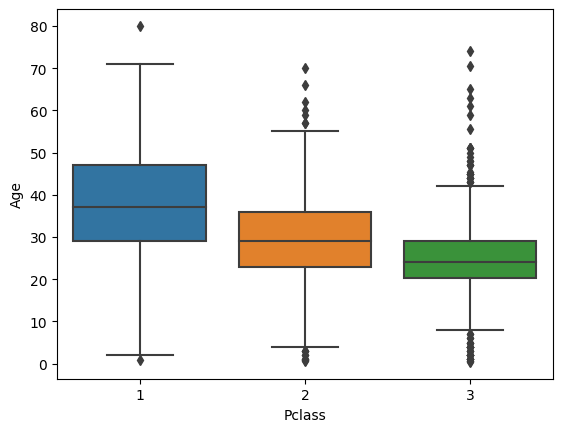

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.dropna(inplace=True)

<Axes: >

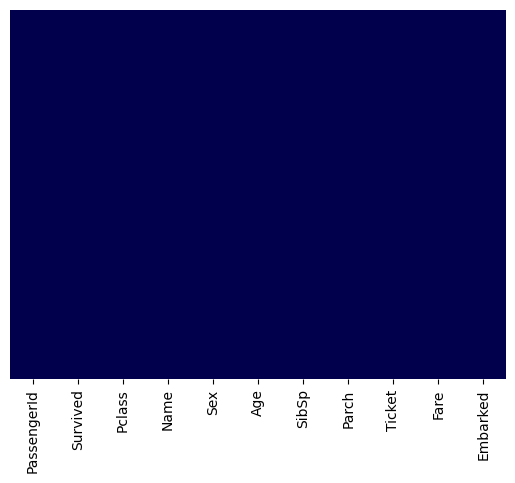

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='seismic')

In [ ]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
train= pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.reset_index(drop = True).head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.drop(train.columns[[0]],axis=1)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,35.0,1,0,113803,53.1000,S,0,0,1
4,0,3,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,211536,13.0000,S,1,0,1
887,1,1,19.0,0,0,112053,30.0000,S,0,0,1
888,0,3,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,1,1,26.0,0,0,111369,30.0000,C,1,0,0


In [ ]:
del train['Embarked']

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
x= train.drop('Survived',axis=1)
y=train['Survived']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgm=LogisticRegression()

In [ ]:
lgm.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred=lgm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,pred)

array([[149,  14],
       [ 39,  65]])